In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import Inf
import urllib2
import sys

### Read using pandas. 

In [167]:
#Data taken from url: https://github.com/jokecamp/FootballData/blob/master/other/stadiums-with-GPS-coordinates.csv
inp = pd.read_csv('./FootballData-master/other/stadiums-with-GPS-coordinates.csv')
inp.head()

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England


In [168]:
city = inp['City']
stadium = inp['Stadium']
dat = zip(city,stadium)

In [173]:
dict = {}
for l in dat:
    if dict.has_key(l[0]):
        dict[l[0]].append(l[1])
    else:
        dict[l[0]]=[l[1]]
cities = dict.keys()
counts = map(lambda l: len(l[1]),dict.items())

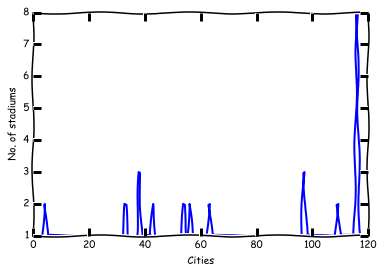

In [174]:
n = np.arange(len(cities))
with plt.xkcd():
    plt.plot(counts)
    plt.xlabel('Cities')
    plt.ylabel('No. of stadiums')

### Peak detection. (Just for the kicks)

In [175]:
def peakdet(v, delta, x = None):
    """Using a sliding window approach here. 
       Parameters: v (data)
                   delta (difference)
                   x (x axis)
       Returns: Some maximas and minimas"""
    maxtab = []
    mintab = []
       
    if x is None:
        x = np.arange(len(v))
    
    v = np.asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not np.isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = np.NaN, np.NaN
    
    lookformax = True
    
    for i in np.arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return np.array(maxtab), np.array(mintab)

### Let's see how it works.

Dundee :['Dens Park', 'Tannadice Park']
Edinburgh :['Easter Road', 'Tynecastle Stadium']
Madrid :['Vicente Calder\xc3\xb3n', 'Campo de Vallecas', 'Santiago Bernab\xc3\xa9u']
Hamburg :['Imtech Arena', 'Millerntor-Stadion']
Liverpool :['Goodison Park', 'Anfield']
Valencia :['Ciutat de Val\xc3\xa8ncia', 'Mestalla']
Seville :['Benito Villamar\xc3\xadn', 'Ram\xc3\xb3n S\xc3\xa1nchez Pizju\xc3\xa1n']
Glasgow :['Celtic Park', 'Firhill Stadium', 'Ibrox Stadium']
Birmingham :['Villa Park', "St Andrew's Stadium"]
London :['Emirates Stadium', 'Stamford Bridge', 'Craven Cottage', 'Loftus Road', 'White Hart Lane', 'Selhurst Park', 'The Den', 'Boleyn Ground']


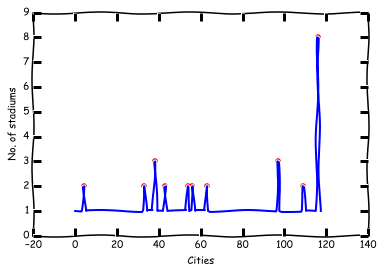

In [191]:
maxtab, mintab = peakdet(counts,0.5) #Still have to adjust for delta. P.S. Minimas aren't really there.
for x in maxtab[:,0]: print '%s :%s' %(cities[x].strip(),map(lambda s: s.strip(),dict[cities[x]])) #Special characters screwed up...
with plt.xkcd():
    plt.plot(counts)
    plt.scatter(maxtab[:,0], maxtab[:,1], color='red')
    plt.xlabel('Cities')
    plt.ylabel('No. of stadiums')